# **Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

¿Qué vas a practicar?
✅ Importar y manipular datos desde una API de manera eficiente.
✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.
✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.






# **📌 Extracción de datos**


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

In [ ]:
df.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df_customer= pd.json_normalize(df['customer'],record_path=None)

In [ ]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

df_final = pd.concat([df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1)

# **🔧 Transformación de datos**

In [ ]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
df_final.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [ ]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df_final.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6114,8364-TRMMK,Yes,Female,0,No,No,3,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.65,151.3
2129,2985-FMWYF,No,Female,0,No,No,23,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,93.50,2341.55
4211,5788-YPOEG,No,Female,0,Yes,Yes,34,Yes,No,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,84.75,2839.45
3393,4704-ERYFC,Yes,Female,0,Yes,No,22,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.25,1554
2886,4002-BQWPQ,No,Male,0,No,No,25,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Yes,Month-to-month,No,Bank transfer (automatic),81.75,2028.8
1949,2761-OCIAX,Yes,Male,1,No,No,2,Yes,No,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.4
5031,6877-TJMBR,Yes,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,84.80,84.8
3563,4910-GMJOT,Yes,Female,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.60,94.6
4653,6371-NZYEG,No,Male,0,Yes,Yes,16,Yes,No,DSL,...,No,Yes,No,Yes,No,Two year,No,Mailed check,64.25,1024
5379,7346-MEDWM,No,Female,0,No,No,59,Yes,Yes,Fiber optic,...,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,83.25,4949.1


In [ ]:
df_final.sort_values('Churn').head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
5228,7132-EASOG,,Male,0,Yes,Yes,7,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,150
5608,7662-TWISV,,Female,0,No,Yes,51,No,No phone service,DSL,...,No,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),60.15,3077
4750,6507-MIKMI,,Female,0,No,No,41,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.30,4443.45
4753,6508-TFQQW,,Male,1,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.30,70.3
1303,1867-RAWZK,,Male,0,Yes,Yes,19,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,No,Electronic check,103.30,2012.7


## **Identificación de Datos**
A continuación, se enlistan el total de 21 columnas que conforman la base de datos, así como una breve descripcion de lo que representa cada una de ellas y los posibles valores que puede aceptar cada una de las listas.
 \
 \
 \

*   **customerID:** Identificador único de cada cliente.

*   **Churn**: Indica si el cliente se dio de baja del servicio (Yes o No)

*   **gender**: Género del cliente (Male o Female).

*   **SeniorCitizen**: Si el cliente es un adulto mayor (1 = sí, 0 = no).

*   **Partner**: Si el cliente tiene pareja (Yes o No).

*   **Dependents**: Si el cliente tiene personas a su cargo (Yes o No).

*   **tenure**: Número de meses que el cliente ha estado con la compañía.

*   **PhoneService**: Si el cliente tiene servicio telefónico (Yes o No).

*   **MultipleLines**: Si el cliente tiene múltiples líneas telefónicas (Yes, No, No phone service).

*   **InternetService**: Tipo de servicio de internet (DSL, Fiber optic, No).

*   **OnlineSecurity**: Si tiene servicio de seguridad en linea(Yes, No, No internet service)

*   **OnlineBackup**: Si tiene servicio de respaldo en línea (Yes, No, No internet service).

*   **DeviceProtection**: Si tiene protección para dispositivos (Yes, No, No internet service)

*   **TechSupport**: Si tiene soporte técnico contratado (Yes, No, No internet service).

*   **StreamingTV**: Si tiene servicio de TV por streaming (Yes, No, No internet service).

*   **StreamingMovies**: Si tiene servicio de películas por streaming (Yes, No, No internet service).

*   **Contract**: Tipo de contrato del cliente (Month-to-month, One year, Two year)

*   **PaperlessBilling**: Si usa facturación sin papel (Yes o No).

*   **PaymentMethod**: Método de pago usado (por ejemplo: Electronic check, Mailed check, etc.).

*   **Charges.Monthly**: Monto mensual que paga el cliente.

*   **Charges.Total**: Total acumulado pagado por el cliente durante su estancia.


## **Comprobando valores unicos en las columnas**

In [ ]:
for col in df_final.columns:
  print(f'Valores unicos en la columna {col}: {df_final[col].nunique()}')
  if df_final[col].nunique()<50:
    print(df_final[col].unique())
  print('-'*50)

Valores unicos en la columna customerID: 7267
--------------------------------------------------
Valores unicos en la columna Churn: 3
['No' 'Yes' '']
--------------------------------------------------
Valores unicos en la columna gender: 2
['Female' 'Male']
--------------------------------------------------
Valores unicos en la columna SeniorCitizen: 2
[0 1]
--------------------------------------------------
Valores unicos en la columna Partner: 2
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna Dependents: 2
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna tenure: 73
--------------------------------------------------
Valores unicos en la columna PhoneService: 2
['Yes' 'No']
--------------------------------------------------
Valores unicos en la columna MultipleLines: 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores unicos en la columna InternetService: 3

## **Comprobando si existen valores nulos o repetidos**

In [ ]:
#Se suman los valores que se identifican como duplicados en una variable
valores_duplicados = df_final.duplicated().sum()
print(f'Numero de lineas duplicadas: {valores_duplicados}')

#Se suman los valores que se encuentran como nulos en otra variable
valores_nulos = df_final.isnull().values.sum()

#Una vez hecho eso imprimen los resultados para saber si nuestro DF necesita arreglos
print('\nValores nulos por columna:')
print(valores_nulos[valores_nulos>0])

Numero de lineas duplicadas: 0

Valores nulos por columna:
[]


## **Comprobando si existen valores con espacio vacío**

In [ ]:
#Creamos una variable valores vacios y guarda la candidad de veces que encuentra
#valores como '' en nuestro DF.
#Usa un lambda para poder realizar ejecuciones dentro de cada columna
#Como se que la usare varias veces lo hago una función.

def BuscarValoresVacios():
  valores_vacios = df_final.apply(lambda x: x.astype(str).str.strip() == '' ).sum()
  print('\n Valores en blanco en las columnas:')
  print(valores_vacios[valores_vacios>0])

BuscarValoresVacios()


 Valores en blanco en las columnas:
Churn            224
Charges.Total     11
dtype: int64


##**Convirtiendo el tipo de datos**

In [ ]:
#Revisamos el tipo de dato de cada columna
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [ ]:
#Aqui podemos identificar los valores en "Charge_total" que tienen un espacio en blanco
#Encontrando valores vacios en charges total utilizando un filtro
df_no = (df_final["Charges.Total"]==' ')
df_final[df_no][['tenure', 'Charges.Total']]

,tenure,Charges.Total
975,0,
1775,0,
1955,0,
2075,0,
2232,0,
2308,0,
2930,0,
3134,0,
3203,0,
4169,0,


In [ ]:
#Realizamos un regex para cambiar los espacios vacios a 0.0
#y lo convertimos en tipo de dato Float
df_final['Charges.Total'] = df_final['Charges.Total'].replace(' ', '0.0', regex=True).astype(np.float64)

In [ ]:
#Ahora si intentamos buscar valores vacios, podemos ver que ya no hay ninguno en Charges.Total
BuscarValoresVacios()



 Valores en blanco en las columnas:
Churn    224
dtype: int64


In [ ]:
#Lo podemos verificar aqui, el valor mas bajo es 0
df_final['Charges.Total'].sort_values().head(3)

,Charges.Total
2308,0.0
1775,0.0
5599,0.0


In [ ]:
#Definimos nuestro query y decimos que queremos borrar el axis 0, es decir, el renglón.
query_borrar = df_final.query('Churn == ""').index

#Ya que el estudio está orientado a calcular estadísticas en base a Churn,
#eliminaré las líneas que no posean este dato.  Ya que no hay manera de conocer su dato
#original y deja nuestro DF inconsistente
df_final.drop(query_borrar, axis=0,inplace=True)

In [ ]:
#Aquí podemos ver como todos los valores vacíos de Churn ya no están presentes
df_final.query('Churn == ""')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [ ]:
#Y aquí podemos ver como ahora solo hay 7043 lineas restantes
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

##**Creando columna de gasto diario**

In [ ]:
#Se crea la columna Cuentas_nuevas a partir de dividir Charges.Monthly sobre 30.
#Por cuestiones prácticas el resultado se redondeara a 2 decimales.
df_final['Cuentas_diarias'] = round(df_final['Charges.Monthly']/30,2)
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [ ]:
#Aquí podemos ver un
df_final['Cuentas_diarias'].describe()

,Cuentas_diarias
count,7043.000000
mean,2.158675
std,1.003088
min,0.610000
25%,1.180000
50%,2.340000
75%,2.990000
max,3.960000


##**Estandarización de datos**
Convirtiendo todos los valores de si y no en true y false

In [ ]:
#Se convierten todos los valores de Yes o No en True y False, de manera que solo maneje
#valores booleanos en donde corresponda.
#Como sé que se hará muchas veces, entonces lo hare una función

def TextoABool (columnaTxt):
  return columnaTxt.map({'Yes': True, 'No': False})

#Aqui se convierte PaperlessBilling como ejemplo
df_final['PaperlessBilling'] = TextoABool(df_final['PaperlessBilling'])

In [ ]:
#Podemos ver que ahora solo hay True o False en PaperlessBilling
df_final['PaperlessBilling'].value_counts()

,count
PaperlessBilling,
True,4171
False,2872


In [ ]:
#Aqui va una lista de las columnas que considero que deberían tener o no valores
#booleanos. 1* significa que si, 2* que no

#1*Churn 1*SeniorCitizen 1*Partner 1*Dependents 1*PhoneService 1*PaperlessBilling
#2*customerID 2*gender 2*tenure 2*MultipleLines 2*InternetService 2*OnlineSecurity
#2*OnlineBackup 2*DeviceProtection 2*TechSupport	2*StreamingTV 2*StreamingMovies
#2*Contract 2*PaymentMethod	2*Charges.Monthly	2*Charges.Total	2*Cuentas_diarias

#Ahora procedo a hacerlos booleanos

df_final['Churn'] = TextoABool(df_final['Churn'])
df_final['Partner'] = TextoABool(df_final['Partner'])
df_final['Dependents'] = TextoABool(df_final['Dependents'])
df_final['PhoneService'] = TextoABool(df_final['PhoneService'])

In [ ]:
#Aqui vemos la lista ya acutualizada
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_diarias
0,0002-ORFBO,False,Female,0,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,False,Male,0,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,True,Male,0,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,True,Male,1,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,True,Female,1,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.80


In [ ]:
#A diferencia de los demas grupos, SeniorCitizen guardaba sus valores binarios en 1 y 0
df_final['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [ ]:
#Por comodidad, transforme tambien este valor a True y False.
df_final['SeniorCitizen'] = df_final['SeniorCitizen'].map({1: True, 0: False})
df_final['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
False,5901
True,1142


In [ ]:
#Aqui podemos ver el resultado final de nuestros tipos de datos.
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   bool   
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   bool   
 4   Partner           7043 non-null   bool   
 5   Dependents        7043 non-null   bool   
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   bool   
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

#📊**Carga y análisis**

##Análisis Descriptivo

###Analisis descriptivo de las variables numericas

In [ ]:
#Aqui hacemos un breve describe de los datos numericos que hay en nuestros datos
#Vemos datos como la cantidad de elementos, el minimo, maximo, la desviacion estandard y
#el promedio y checkpoint de 25%, 50% y 75%
df_final.describe()

,tenure,Charges.Monthly,Charges.Total,Cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


In [ ]:
#Se crea un DataFrame que contenga unicamente los valores numericos que voy a consultar
#de esa manera tengo la informacion mas ordenada
df_datos_numericos= df_final[['tenure','Charges.Monthly','Cuentas_diarias','Charges.Total']]
df_datos_numericos.sample(3)

,tenure,Charges.Monthly,Cuentas_diarias,Charges.Total
1281,50,103.70,3.46,5071.05
6874,63,109.25,3.64,6841.40
5939,72,106.30,3.54,7565.35


###Boxplot de analisis descriptivo

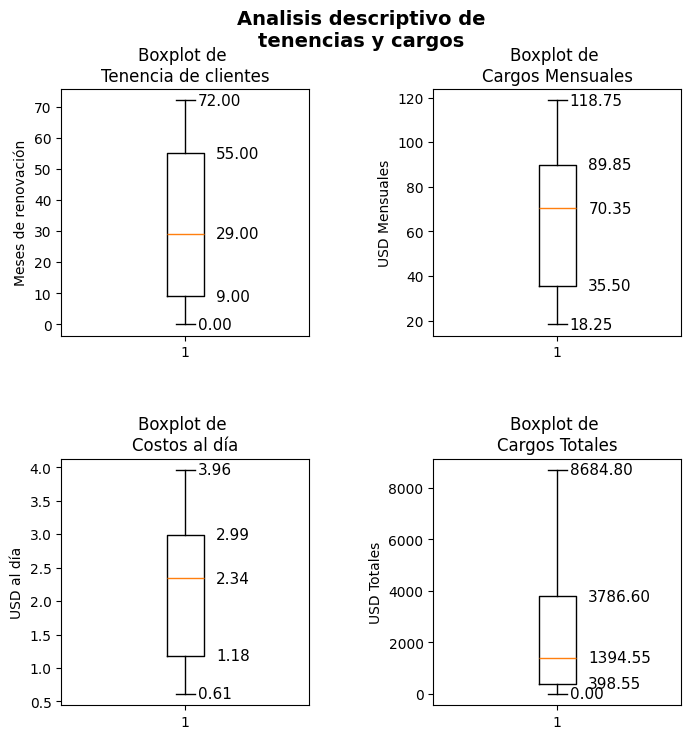

In [ ]:
import matplotlib.pyplot as plt

#Defíno una función para crear boxplots que necesite

def boxplot_graf(pos1, pos2, columna, titulo, xlabel, ylabel):
  #Guardo mi boxplot en una variable para poder usar su info para calculos
  bp = axs[pos1][pos2].boxplot(columna)

  #Defino el tamaño de letra por si necesito cambiarlo después
  tam_letra = 11

  for line in bp['medians']:
    x, y = line.get_xydata()[1]
    axs[pos1][pos2].text(x + 0.05, y, f'{y:.2f}', va='center', fontsize=tam_letra)

  #Labels de min y max
  for i, line in enumerate(bp['whiskers']):
        x, y = line.get_xydata()[1]
        axs[pos1][pos2].text(x + 0.05, y, f'{y:.2f}', va='center', fontsize=tam_letra)

  #Labels para el 25% y 75%
  for i, box in enumerate(bp['boxes']):
    y_25 = box.get_ydata()[1]
    y_75 = box.get_ydata()[2]
    x_q = box.get_xdata()[1]
    axs[pos1][pos2].text(x_q + 0.05, y_25, f'{y_25:.2f}', va='center', fontsize=tam_letra)
    axs[pos1][pos2].text(x_q + 0.05, y_75, f'{y_75:.2f}', va='center', fontsize=tam_letra)

  #Titulos y ejes
  axs[pos1][pos2].set_title(f'Boxplot de \n{titulo}')
  axs[pos1][pos2].set_xlabel(xlabel)
  axs[pos1][pos2].set_ylabel(ylabel)

fig, axs = plt.subplots (2,2, figsize=(8,8))
fig.subplots_adjust(hspace=.5,wspace=.5)
fig.suptitle('Analisis descriptivo de\ntenencias y cargos\n',fontsize=14, weight='bold')

boxplot_graf(0, 0, df_datos_numericos['tenure'], 'Tenencia de clientes', '', 'Meses de renovación')
boxplot_graf(0, 1, df_datos_numericos['Charges.Monthly'], 'Cargos Mensuales', '', 'USD Mensuales')
boxplot_graf(1, 0, df_datos_numericos['Cuentas_diarias'], 'Costos al día', '', 'USD al día')
boxplot_graf(1, 1, df_datos_numericos['Charges.Total'], 'Cargos Totales', '', 'USD Totales')

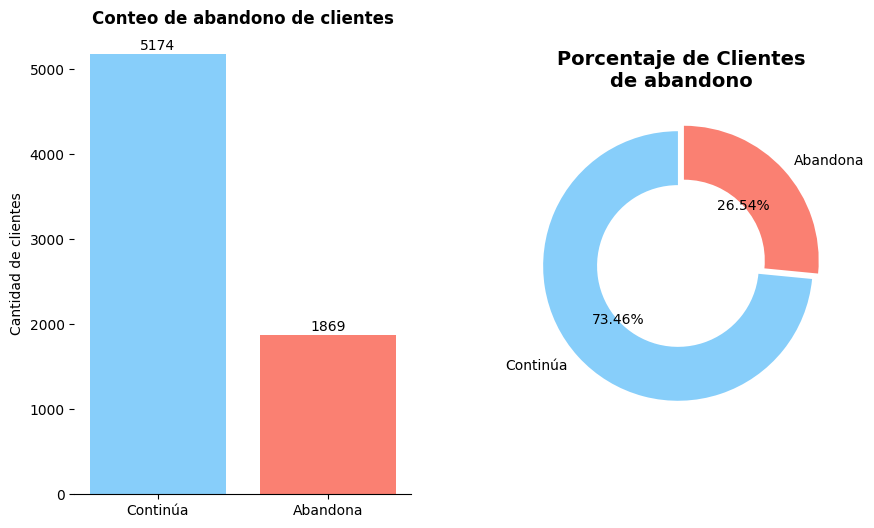

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Convertimos Churn en algo contable
abandono_counts = df_final['Churn'].value_counts().sort_index()

#Definimos colores y subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(wspace=.3)
colores = ['lightskyblue', 'salmon','royalblue','tomato','orange','forestgreen','orchid','purple','brown',\
           'slateblue', 'gray', 'olive', 'navy', 'teal']

#Damos parametros a nuestro grafico de barras
bars = axs[0].bar(
    abandono_counts.index.astype(str),
    abandono_counts.values,
    color=colores)

#Aqui damos formato a la grafica 1
axs[0].set_title('Conteo de abandono de clientes',fontsize=12, weight='bold', loc='center')
axs[0].set_ylabel('Cantidad de clientes')
axs[0].spines[['top','left','right']].set_visible(False)
axs[0].set_xticks([0, 1])
#axs[0].set_xticklabels(['Sí', 'No'], fontweight='bold')
axs[0].set_xticklabels(['Continúa', 'Abandona'])
axs[0].xaxis.set_tick_params(labelsize=10)
axs[0].yaxis.set_tick_params(labelsize=10)


#Aqui se imprimen los numeros sobre las barras
for i, valor in enumerate(abandono_counts.values):
    axs[0].text( i,
        valor + 100,
        f'{valor}',
        ha='center',
        va='center')

#Escondemos la cuadricula
axs[0].grid(False)


#Aqui se hace la grafica de círculo
explode = [0.03] * len(abandono_counts)
axs[1].pie(abandono_counts,
           labels=['Continúa', 'Abandona'],
           autopct=lambda x: f"{x:.2f}%",
           startangle=90,
           explode=explode,
           wedgeprops={"width": 0.4},
           textprops={'fontsize': 10},
           colors=colores
           )
axs[1].set_title('Porcentaje de Clientes\nde abandono', fontsize = 14, weight='bold', loc='center')

plt.show()

##Recuento de evasión por variables categóricas

In [ ]:
#Para facilitar mis datos, creare 2 DF que contengan, solo los clientes que abandonaron
#y otro donde esten los que no abandonaron
df_n = (df_final["Churn"]==False)
df_y = (df_final["Churn"]==True)
df_final[df_n]

df_abandono = df_final[df_n]
df_continua = df_final[df_y]

In [ ]:
#Compruebo si mis DF estan completos
print(len(df_abandono))
print(len(df_continua))
print(len(df_abandono)+len(df_continua))

5174
1869
7043


In [ ]:
len(df_final)

7043

In [ ]:
df_final.DeviceProtection.value_counts()

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


###Graficación de variables categoricas más importantes

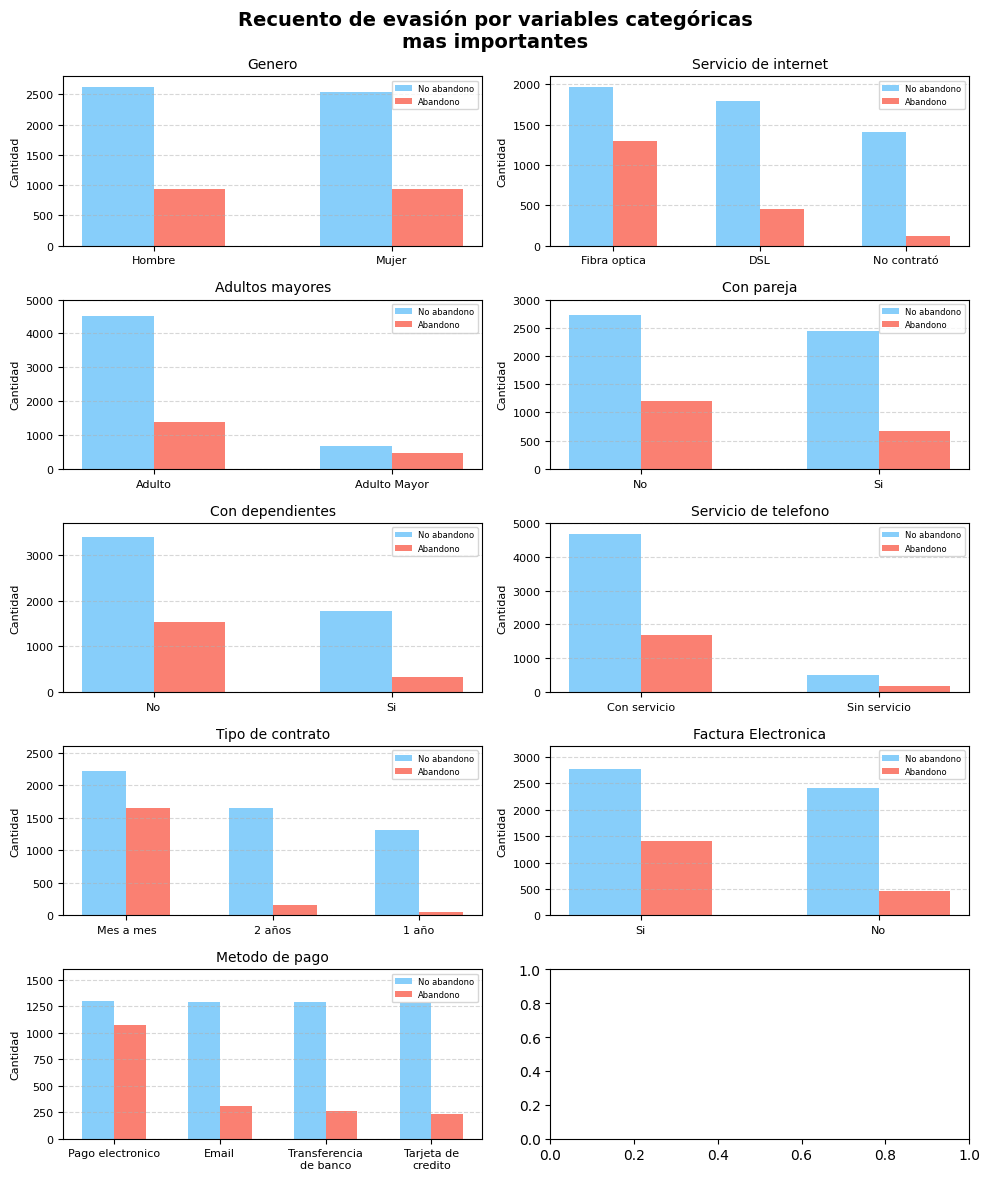

In [ ]:
#Primero identifico las variables categoricas mas importantes para realizar un conteo
#gender InternetService SeniorCitizen Partner Dependents PhoneService Contract PaperlessBilling PaymentMethod

import matplotlib.pyplot as plt
import numpy as np
colores = ['lightskyblue', 'salmon']
#Defino una funcion para hacer cada grafica
def graf_comparacion(pos1,pos2,ylim,columna,titulo,categorias):
  #Creo una variable que haga value counts en cada iteracion para mas facilidad y
  #una variable de tamaño para facilitar el cambio de fuentes.
  valores = df_final[columna].value_counts()
  tam_font = 8

  #Aqui en numpy arange me ayuda a calcular los puntos en mi grafica, con esos puntos
  #puedo poner columnas una al lado de otra para mejor facilidad visual.
  x = np.arange(len(valores))
  axs[pos1][pos2].bar(x - 0.15, df_abandono[columna].value_counts(), width=0.3, label="No abandono",color = colores[0])
  axs[pos1][pos2].bar(x + 0.15, df_continua[columna].value_counts(), width=0.3, label="Abandono",color = colores[1])

  #Le pongo nombre a los ticks y formato tambien
  axs[pos1][pos2].set_xticks(x)
  axs[pos1][pos2].set_xticklabels(categorias, ha='center')
  axs[pos1][pos2].set_ylabel('Cantidad',fontsize=tam_font)
  axs[pos1][pos2].tick_params(axis='x', labelsize=tam_font)
  axs[pos1][pos2].tick_params(axis='y', labelsize=tam_font)

  #Agrego titulo y unos cuantos decoradores, asi como limitaciones a mi grafica
  axs[pos1][pos2].set_title(titulo, fontsize=10)
  axs[pos1][pos2].set_ylim(0,ylim)
  axs[pos1][pos2].grid(axis='y', linestyle='--', alpha=0.5)
  axs[pos1][pos2].legend(fontsize=tam_font-2)

fig, axs = plt.subplots (5,2, figsize=(10,12))
fig.subplots_adjust(hspace=.5,wspace=.4)
fig.suptitle('Recuento de evasión por variables categóricas\nmas importantes',fontsize=14, weight='bold')

#En esta ocacion, hay muchas cosas que definir de manera individual, como son los ticks personalizados o
#la altura maxima de las tablas, por lo que no hare las cosas en un ciclo for
#sino que metere los valores a mano.

graf_comparacion(0, 0,2800,'gender','Genero',['Hombre','Mujer'])
graf_comparacion(0, 1,2100,'InternetService','Servicio de internet',['Fibra optica','DSL', 'No contrató'])
graf_comparacion(1, 0,5000,'SeniorCitizen','Adultos mayores',['Adulto','Adulto Mayor'])
graf_comparacion(1, 1,3000,'Partner','Con pareja',['No','Si'])
graf_comparacion(2, 0,3700,'Dependents','Con dependientes',['No','Si'])
graf_comparacion(2, 1,5000,'PhoneService','Servicio de telefono',['Con servicio','Sin servicio'])
graf_comparacion(3, 0,2600,'Contract','Tipo de contrato',['Mes a mes','2 años','1 año'])
graf_comparacion(3, 1,3200,'PaperlessBilling','Factura Electronica',['Si','No'])
graf_comparacion(4, 0,1600,'PaymentMethod','Metodo de pago',['Pago electronico','Email','Transferencia\nde banco','Tarjeta de\ncredito'])

plt.tight_layout()
plt.show()

###Calculo de todas las variables categoricas y su porcentaje.

In [ ]:
#Ahora, para conocer el porcentaje de abandono de variables categóricas, primero
#será necesario identificar todas las variables categóricas de manera independiente.

categoricas=['gender',	'SeniorCitizen',	'Partner',	'Dependents',	'PhoneService',
'MultipleLines',	'InternetService', 'OnlineSecurity', 'OnlineBackup',	'DeviceProtection',
'TechSupport', 'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling','PaymentMethod']


#Defíno una función que me separe cada iteración
def printo(col):
    print('-' * 40)
    # Guardo el conteo de cada posibilidad en las categorías y su porcentaje en variables
    conteos = df_final[col].value_counts(dropna=False)
    porcentajes = df_final[col].value_counts(normalize=True, dropna=False) * 100

    # Tambien guardo la cantidad de churns de mi dataframe
    churn_tabla = pd.crosstab(df_final[col], df_final['Churn'], dropna=False)
    churn_pct = pd.crosstab(df_final[col], df_final['Churn'], normalize='index', dropna=False) * 100

    #Guardo todo dentro de un nuevo DataFrame y lo al final esta listo para imprimir
    resultado = pd.DataFrame({'conteo_total': conteos,'porcentaje del total': porcentajes.round(1),
        'Cantidad quedar': churn_tabla.get(False, 0),'Cantidad Abandono': churn_tabla.get(True, 0),
        'Porcentaje quedar': churn_pct.get(False, 0).round(1),'Porcentaje abandono': churn_pct.get(True, 0).round(1)
        })
    print(resultado)

for cat in categoricas:
    printo(cat)

----------------------------------------
        conteo_total  porcentaje del total  Cantidad quedar  \
gender                                                        
Female          3488                  49.5             2549   
Male            3555                  50.5             2625   

        Cantidad Abandono  Porcentaje quedar  Porcentaje abandono  
gender                                                             
Female                939               73.1                 26.9  
Male                  930               73.8                 26.2  
----------------------------------------
               conteo_total  porcentaje del total  Cantidad quedar  \
SeniorCitizen                                                        
False                  5901                  83.8             4508   
True                   1142                  16.2              666   

               Cantidad Abandono  Porcentaje quedar  Porcentaje abandono  
SeniorCitizen                        

###Graficación de porcentaje de las variables categoricas

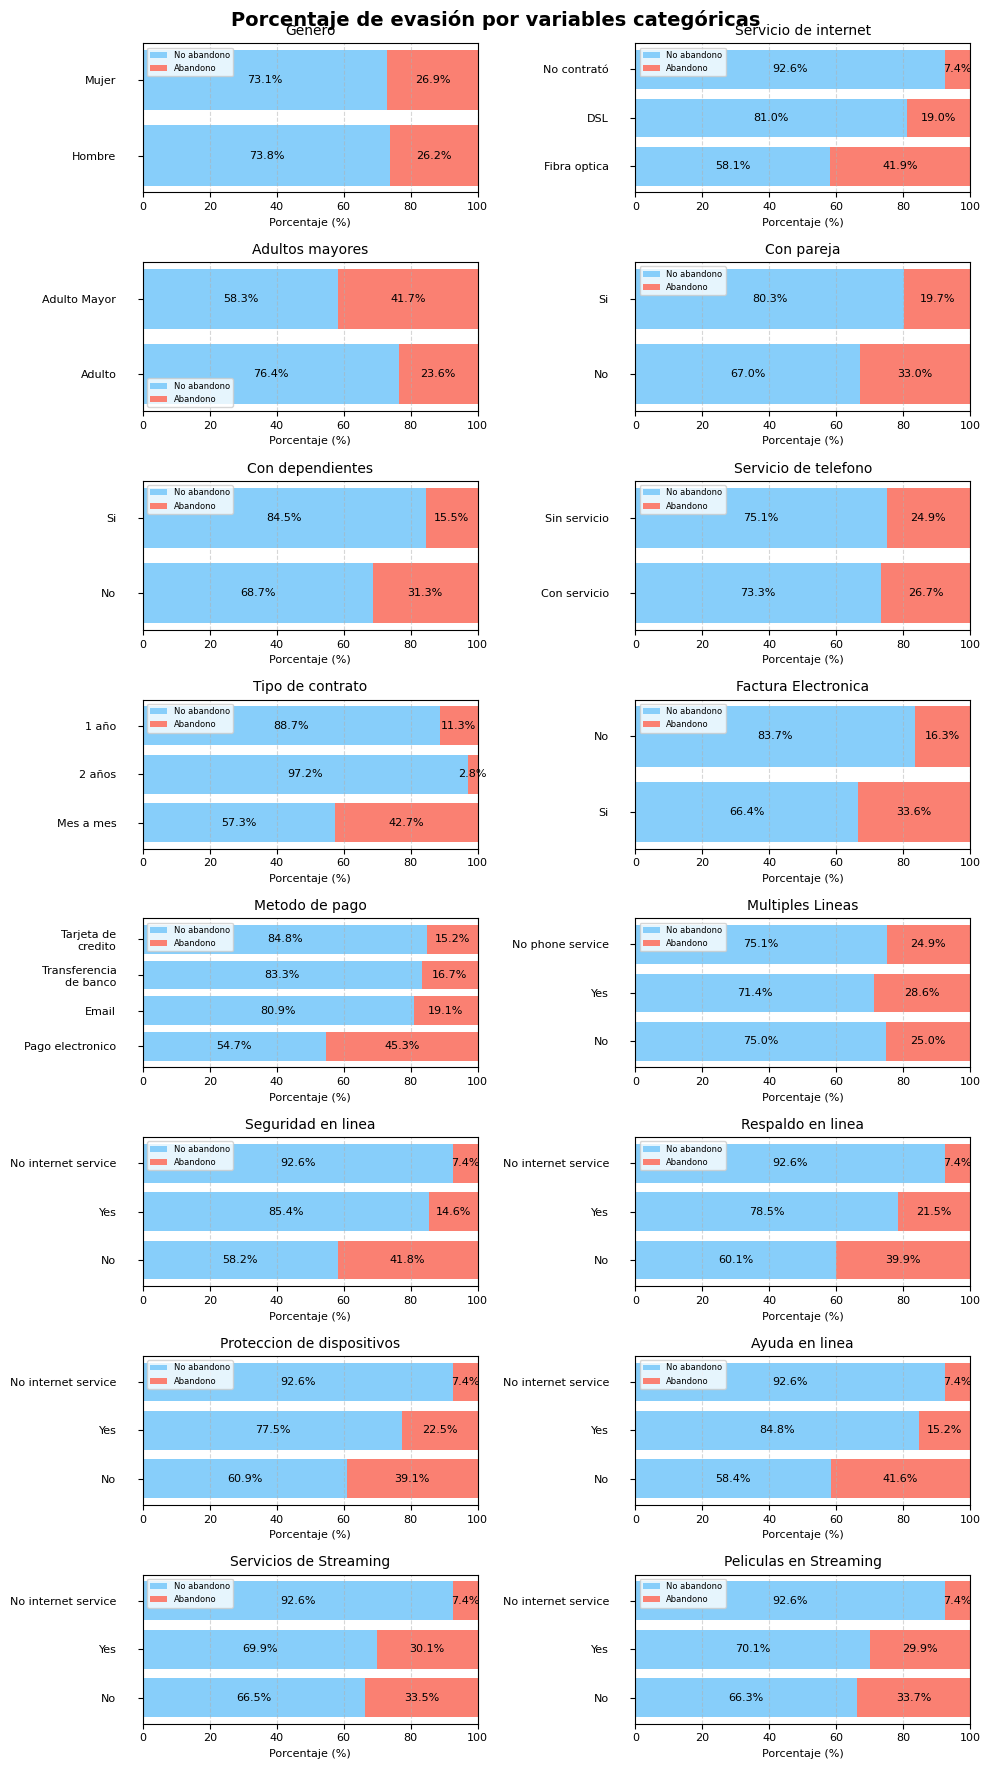

In [ ]:
#Creo mi función para crear graficas apiladas de porcentaje
def graf_comparacion_pct(pos1, pos2, columna, titulo, categorias):

  #Se guardan los value counts dentro de una variable, junto con otras cositas que usaremos
  totales_col = df_final[columna].value_counts()
  orden = totales_col.index.tolist()
  tam_font = 8

  # Conteos de abandono y continuación
  aban = df_continua[columna].value_counts().reindex(orden, fill_value=0)
  cont = df_abandono[columna].value_counts().reindex(orden, fill_value=0)

    #
  tot = cont + aban
  pct_cont = np.where(tot > 0, cont / tot * 100, 0.0)
  pct_aban = np.where(tot > 0, aban / tot * 100, 0.0)

  y = np.arange(len(orden))

  # Aqui imprimimos las barras una sobre la otra
  axs[pos1][pos2].barh(y, pct_cont, label="No abandono", color=colores[0])
  axs[pos1][pos2].barh(y, pct_aban, left=pct_cont, label="Abandono", color=colores[1])

  # Aqui se imprimen las etiquetas y ticks
  etiquetas = categorias if len(categorias) == len(orden) else orden
  axs[pos1][pos2].set_yticks(y)
  axs[pos1][pos2].set_yticklabels(etiquetas, ha='right')

  #Aqui acomodo poquito los labels de los ticks para que no se sobrepongan
  for label in axs[pos1][pos2].get_yticklabels():
    label.set_x(-0.05)

  axs[pos1][pos2].set_xlabel('Porcentaje (%)', fontsize=tam_font)
  axs[pos1][pos2].tick_params(axis='x', labelsize=tam_font)
  axs[pos1][pos2].tick_params(axis='y', labelsize=tam_font)
  axs[pos1][pos2].set_title(titulo, fontsize=10)
  axs[pos1][pos2].set_xlim(0, 100)
  axs[pos1][pos2].grid(axis='x', linestyle='--', alpha=0.5)
  axs[pos1][pos2].legend(fontsize=tam_font-2)

  # Aqui se muestran los porcentajes, solo es un calculo para centrar el text y formato de letra
  for i in range(len(y)):
    if pct_cont[i] > 0:
      axs[pos1][pos2].text(pct_cont[i] / 2, y[i], f"{pct_cont[i]:.1f}%",
                           va='center', ha='center', fontsize=tam_font, color='black')
    if pct_aban[i] > 0:
      axs[pos1][pos2].text(pct_cont[i] + pct_aban[i] / 2, y[i], f"{pct_aban[i]:.1f}%",
                                 va='center', ha='center', fontsize=tam_font, color='black')

fig, axs = plt.subplots (8,2, figsize=(10,18))
fig.subplots_adjust(hspace=.5,wspace=.4)
fig.suptitle('Porcentaje de evasión por variables categóricas',fontsize=14, weight='bold')

graf_comparacion_pct(0, 0,'gender','Genero',['Hombre','Mujer'])
graf_comparacion_pct(0, 1,'InternetService','Servicio de internet',['Fibra optica','DSL','No contrató'])
graf_comparacion_pct(1, 0,'SeniorCitizen','Adultos mayores',['Adulto','Adulto Mayor'])
graf_comparacion_pct(1, 1,'Partner','Con pareja',['No','Si'])
graf_comparacion_pct(2, 0,'Dependents','Con dependientes',['No','Si'])
graf_comparacion_pct(2, 1,'PhoneService','Servicio de telefono',['Con servicio','Sin servicio'])
graf_comparacion_pct(3, 0,'Contract','Tipo de contrato',['Mes a mes','2 años','1 año'])
graf_comparacion_pct(3, 1,'PaperlessBilling','Factura Electronica',['Si','No'])
graf_comparacion_pct(4, 0,'PaymentMethod','Metodo de pago',['Pago electronico','Email','Transferencia\nde banco','Tarjeta de\ncredito'])

graf_comparacion_pct(4, 1,'MultipleLines','Multiples Lineas',['Si','No'])
graf_comparacion_pct(5, 0,'OnlineSecurity','Seguridad en linea',['Si','No'])
graf_comparacion_pct(5, 1,'OnlineBackup','Respaldo en linea',['Si','No'])
graf_comparacion_pct(6, 0,'DeviceProtection','Proteccion de dispositivos',['Si','No'])
graf_comparacion_pct(6, 1,'TechSupport','Ayuda en linea',['Si','No'])
graf_comparacion_pct(7, 0,'StreamingTV','Servicios de Streaming',['Si','No'])
graf_comparacion_pct(7, 1,'StreamingMovies','Peliculas en Streaming',['Si','No'])

plt.tight_layout()
plt.show()

###Manejo de variables numericas.

In [ ]:
#Anteriormente ya ha hecho un boxplot de las variables numericas.
#Ahora que conozco sus parametros puedo realizar

In [ ]:
df_numericos = df_final[['Churn','tenure','Charges.Monthly','Charges.Total','Cuentas_diarias']]
df_numericos.head()

,Churn,tenure,Charges.Monthly,Charges.Total,Cuentas_diarias
0,False,9,65.6,593.30,2.19
1,False,9,59.9,542.40,2.00
2,True,4,73.9,280.85,2.46
3,True,13,98.0,1237.85,3.27
4,True,3,83.9,267.40,2.80


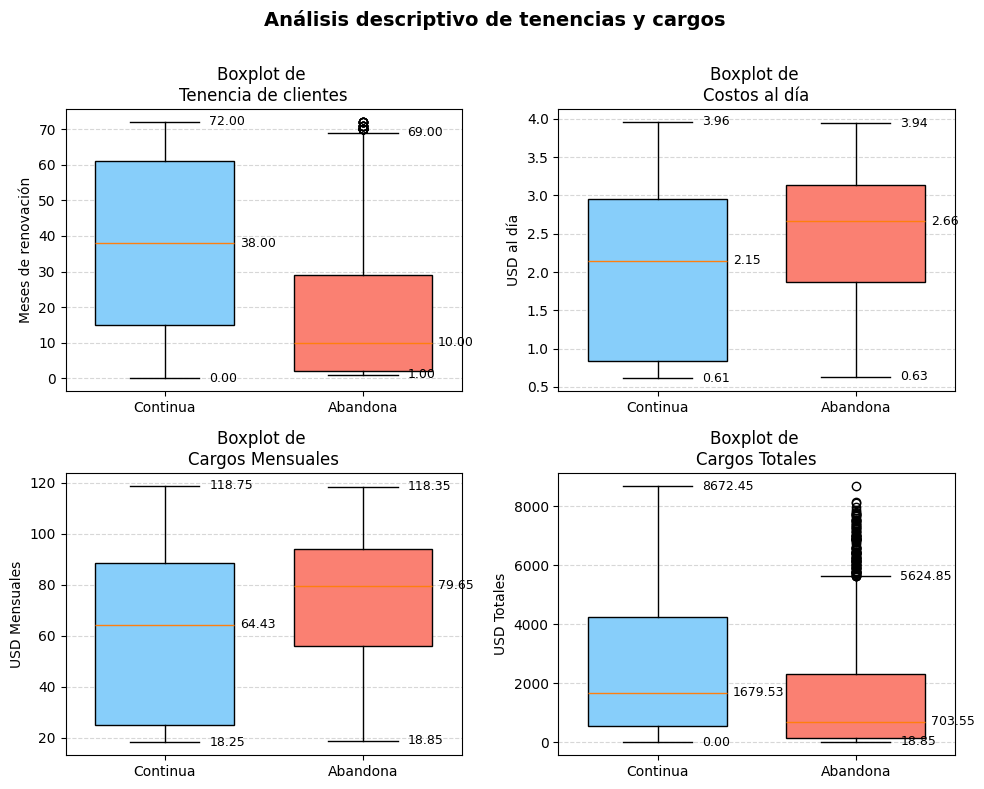

In [ ]:
#Realizamos unos cambios la funcion de boxplots que realizamos anteriormente
#para poder ver un boxplot de los datos afectados por churn
def boxplot_graf_churn(pos1, pos2, df, columna, titulo, xlabel, ylabel):
  datos_true = df[df['Churn'] == True][columna]
  datos_false = df[df['Churn'] == False][columna]

  # Boxplot
  bp = axs[pos1][pos2].boxplot(
      [datos_false, datos_true],
      tick_labels=['Continua','Abandona'],
      patch_artist=True,
      widths=0.7  # <-- ancho de las cajas
    )

  # Colores
  colores = ['lightskyblue','salmon']
  for patch, color in zip(bp['boxes'], colores):
    patch.set_facecolor(color)

  tam_letra = 9

  # Medianas
  for line in bp['medians']:
    x, y = line.get_xydata()[1]
    axs[pos1][pos2].text(x + 0.03, y, f'{y:.2f}', va='center', fontsize=tam_letra)

  # Whiskers
  #for i, line in enumerate(bp['whiskers']):
   # x, y = line.get_xydata()[1]
    #axs[pos1][pos2].text(x, y , f'{y:.2f}', va='center', fontsize=tam_letra)

  # Caps (mínimo y máximo)
  for i, cap in enumerate(bp['caps']):
    x, y = cap.get_xydata()[0]
    axs[pos1][pos2].text(x + 0.40, y, f'{y:.2f}', va='center', fontsize=tam_letra)

  axs[pos1][pos2].set_title(f'Boxplot de \n{titulo}')
  axs[pos1][pos2].set_xlabel(xlabel)
  axs[pos1][pos2].set_ylabel(ylabel)
  axs[pos1][pos2].grid(axis='y', linestyle='--', alpha=0.5)


# Crear figura y ejes
fig, axs = plt.subplots(2,2, figsize=(10,8))
fig.subplots_adjust(hspace=.5,wspace=.5)
fig.suptitle('Análisis descriptivo de tenencias y cargos\n', fontsize=14, weight='bold')

# Graficar
boxplot_graf_churn(0, 0, df_numericos, 'tenure', 'Tenencia de clientes', '', 'Meses de renovación')
boxplot_graf_churn(1, 0, df_numericos, 'Charges.Monthly', 'Cargos Mensuales', '', 'USD Mensuales')
boxplot_graf_churn(0, 1, df_numericos, 'Cuentas_diarias', 'Costos al día', '', 'USD al día')
boxplot_graf_churn(1, 1, df_numericos, 'Charges.Total', 'Cargos Totales', '', 'USD Totales')

plt.tight_layout()
plt.show()

##Graficas de evasión por variables numericas

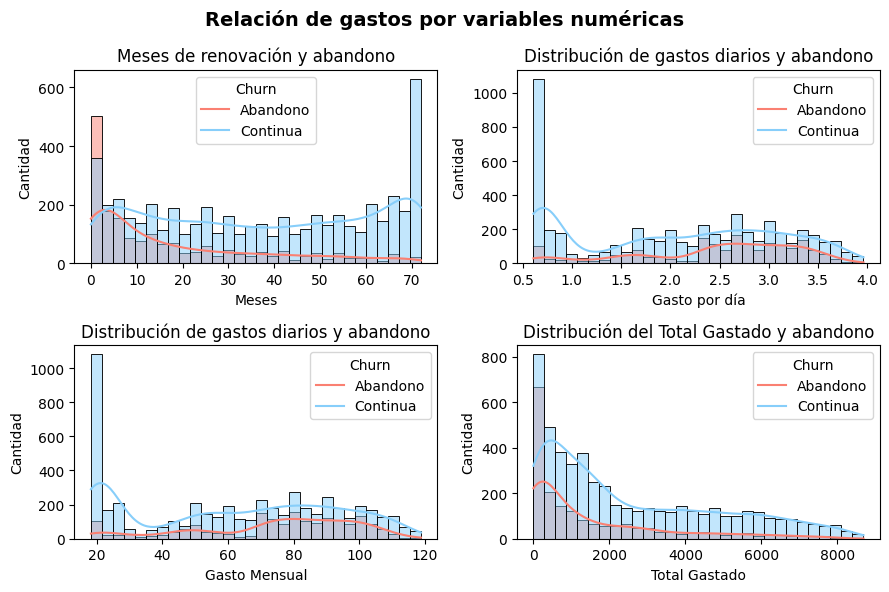

In [ ]:
#Aqui hacemos un hisplot para identificar las relaciones entre la cantidad de abandonos
#conforme aumentan los costos o los meses.
colores = ['lightskyblue', 'salmon']

def grafica_numericos(pos1, pos2,df, columna, titulo, xlabel):

    sns.histplot(data=df, x=columna, hue='Churn', kde=True, palette=colores, bins=30, ax=axs[pos1][pos2])
    axs[pos1][pos2].set_title(titulo)
    axs[pos1][pos2].set_xlabel(xlabel)
    axs[pos1][pos2].set_ylabel('Cantidad')
    axs[pos1][pos2].legend(labels=['Abandono','Continua'], title='Churn')


fig, axs = plt.subplots (2,2, figsize=(9,6))
fig.subplots_adjust(hspace=.5,wspace=.4)
fig.suptitle('Relación de gastos por variables numéricas',fontsize=14, weight='bold')

grafica_numericos(0,0, df_numericos, 'tenure', 'Meses de renovación y abandono','Meses')
grafica_numericos(0,1, df_numericos, 'Cuentas_diarias', 'Distribución de gastos diarios y abandono','Gasto por día')
grafica_numericos(1,0, df_numericos, 'Charges.Monthly', 'Distribución de gastos diarios y abandono','Gasto Mensual')
grafica_numericos(1,1, df_numericos, 'Charges.Total', 'Distribución del Total Gastado y abandono','Total Gastado')

plt.tight_layout()
plt.show()

##Mapas de correlación

In [ ]:
df_final.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'Cuentas_diarias']

In [ ]:
#Aqui elijo las variables que me quiero quedar para realizar la correlación, dropeo las que no considero necesarias.

df_corr = df_final
df_corr = df_corr.drop(['customerID'], axis=1)

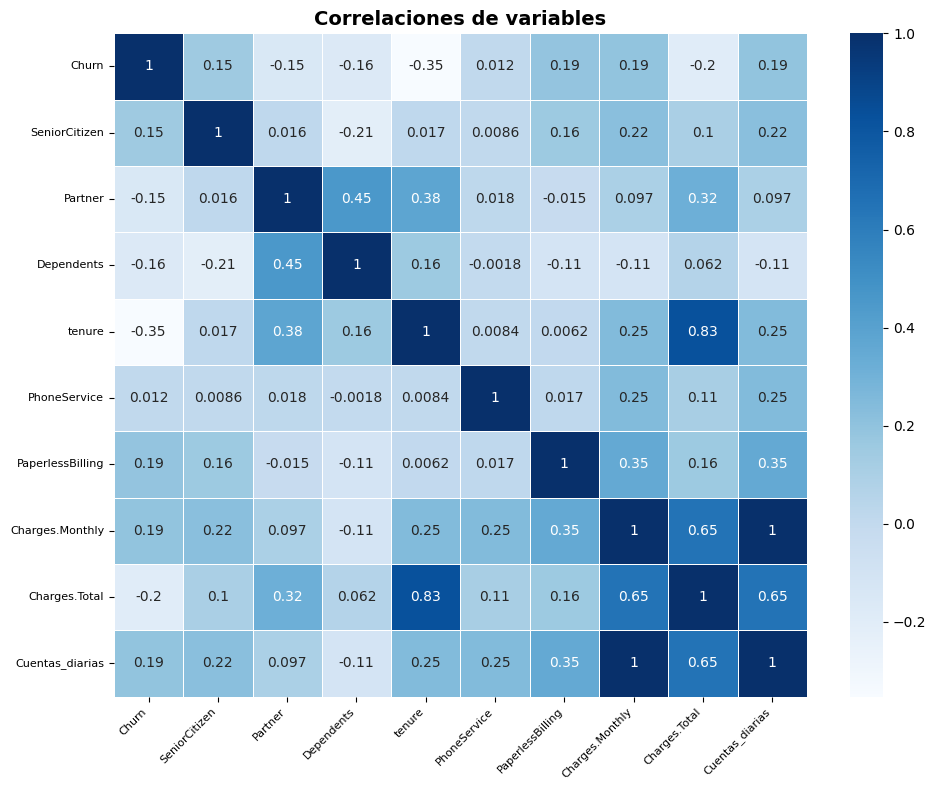

In [ ]:
tam_letra = 8
plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, linecolor="white", linewidths=0.5, cmap="Blues")
plt.title("Correlaciones de variables", fontsize=14, weight='bold', ha='center')

plt.xticks(rotation=45, ha="right", fontsize=tam_letra)
plt.yticks(rotation=0, fontsize=tam_letra)

plt.tight_layout()
plt.show()


---

#**Informe final ✅**

---


## **Introducción**
El siguiente análisis forma parte de un estudio realizado por la empresa Telecom X, tras identificar una problemática donde una grande cantidad de clientes están cancelando su servicio.

El objetivo de este análisis se centra en recopilar, procesar y analizar la información contenida dentro de la base de datos de clientes de la empresa y así poder identificar patrones, características o comportamientos que puedan estar provocando que los clientes cancelen su servicio, de esta manera, podremos orientar a la empresa Telecom X a tomar medidas de respuesta con el objetivo de reducir la taza de cancelación de los clientes.


## **Limpieza y Tratamiento de Datos**

Para iniciar, es importante platear los pasos a seguir para tener un correcto funcionamiento de nuestra información, además de un orden coherente en nuestras variables.
\
\
Para eso se siguieron los siguientes pasos:
1.	Importación:  Se recopila la base de datos de un banco en línea
2.	Desglose de información: Teniendo la base de datos, es importante convertir ciertos datos que vienen encapsulados en sus propias columnas.
3.	Comprobación de datos únicos: Se hace un recorrido en las columnas para identificar los valores posibles de cada una de las columnas
4.	Identificar irregularidades: Es importante identificar datos incorrectos que puedan afectar el análisis.  Dígase, por ejemplo, valores con espacios en blanco o valores nulos.
5.	Reparación de datos: Tras identificar las irregularidades, se toma la decisión de arreglar los datos inconsistentes o eliminarlos para evitar errores a futuro.
6.	Conversión de tipos de datos:  Es posible que ciertos datos adoptaran un tipo de dato de manera automática. Por lo que, si queremos manipularlos correctamente, será necesario convertirlos a un tipo de dato correcto.
7.	Información extra: Puede ser que necesitemos crear nuevos conjuntos de datos en base a lo que ya tenemos
8.	Graficación de datos: Se realizan gráficas de los datos, tanto booleanos como numéricos.
9.	Análisis de resultados: Se realiza el análisis de resultados.


### **1.	Importación**
Se realizó la importación de la base de datos para su accesos y manipulación dentro de una variable llamada DF.

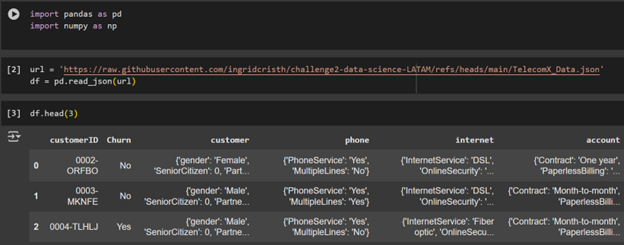

Se puede ver cómo es que la base de datos tiene solo las columnas CustomerID, Churn, customer, pone, internet y Account. Dentro de los valores de las ultimas 4

Los datos están encapsulados, por lo que será necesario separarlos.


### **2.	Desglose de información**
Para separar los datos que mencionamos en el punto 1, se utiliza un método llamado normalize, el cual es parte de la librería de pandas y se utiliza para crear columnas nuevas que guarden la información encapsulada en diccionarios y listas.


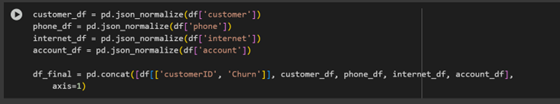

Es así como guardamos todas las columnas nuevas dentro de una variable llamada df_final.	Esta contiene las siguientes columnas y los siguientes valores.
*   customerID: Identificador único de cada cliente.
*   Churn: Indica si el cliente se dio de baja del servicio (Yes o No)
*   gender: Género del cliente (Male o Female).
*   SeniorCitizen: Si el cliente es un adulto mayor (1 = sí, 0 = no).
*   Partner: Si el cliente tiene pareja (Yes o No).
*   Dependents: Si el cliente tiene personas a su cargo (Yes o No).
*   tenure: Número de meses que el cliente ha estado con la compañía.
*   PhoneService: Si el cliente tiene servicio telefónico (Yes o No).
*   MultipleLines: Si el cliente tiene múltiples líneas telefónicas (Yes, No, No phone service).
*   InternetService: Tipo de servicio de internet (DSL, Fiber optic, No).
*   OnlineSecurity: Si tiene servicio de seguridad en línea (Yes, No, No internet service)
*   OnlineBackup: Si tiene servicio de respaldo en línea (Yes, No, No internet service).
*   DeviceProtection: Si tiene protección para dispositivos (Yes, No, No internet service)
*   TechSupport: Si tiene soporte técnico contratado (Yes, No, No internet service).
*   StreamingTV: Si tiene servicio de TV por streaming (Yes, No, No internet service).
*   StreamingMovies: Si tiene servicio de películas por streaming (Yes, No, No internet service).
*   Contract: Tipo de contrato del cliente (Month-to-month, One year, Two year)
*   PaperlessBilling: Si usa facturación sin papel (Yes o No).
*   PaymentMethod: Método de pago usado (por ejemplo: Electronic check, Mailed check, etc.).
*   Charges.Monthly: Monto mensual que paga el cliente.
*   Charges.Total: Total acumulado pagado por el cliente durante su estancia.


### **3.	Comprobación de datos únicos**
Dentro en la siguiente imagen, lo que podemos observar es un código que recorre todas las columnas y se encarga de verificar cuantos tipos de resultados diferentes hay presentes. En su mayoría son solo “Si” y “No”, pero hay otros con 3, 4 y más valores únicos. Con esto nos podemos dar una idea de los que necesitamos para manejar los parámetros de cada variable.


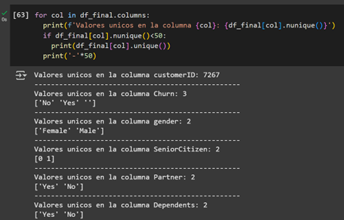

### **4.	Identificar irregularidades**
En la imagen anterior no lo mencioné, pero se puede ver como churn tiene como valor: “”
Esto es una de las irregularidades que tenemos que tratar para tener una base de datos libre de valores erróneos. Para ello se llevó a cabo una limpieza de todas las columnas, donde buscamos cosas como, valores duplicados, espacios en blanco y valores NAN.

Con el siguiente código, nos encargamos de encontrar valores duplicados.


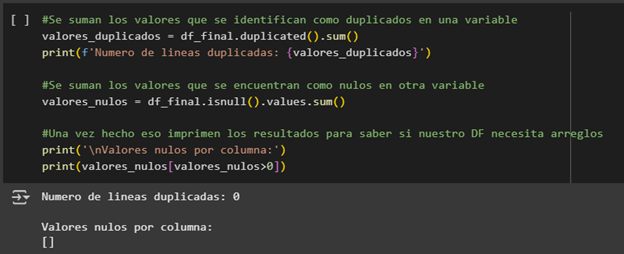


Con este otro buscamos valores en blanco


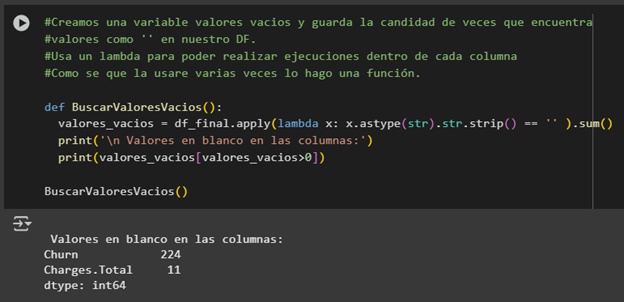

### **5.	Reparación de datos**
Como en este caso, si hubo datos en blanco, fue necesario identificar cuáles eran y qué hacer con ellos.  En el caso de Charges total, se descubrió que, a pesar de ser valores en blanco, era posible identificar qué valor debía de ir, ya que todos se trataban de clientes con 0 meses de renovación, lo que significa que el total que han gastado es equivalente a 0.


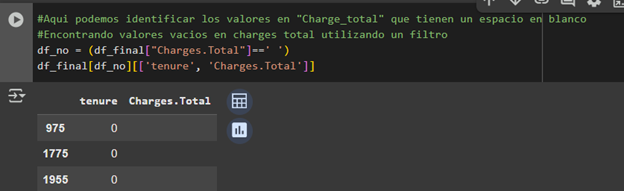

Para llenar estos espacios utilizamos la función regex y ponemos todo en 0.0 y como valor numérico, en este caso, float.

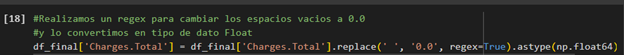

Para los valores vacíos de Churn, no hay manera de garantizar que los valores que faltan sean verdaderos o falsos, razón por la cual, al tratarse de un estudio que depende totalmente de la variable Churn, decidí borrar todos los registros donde Churn tuviese valores vacíos

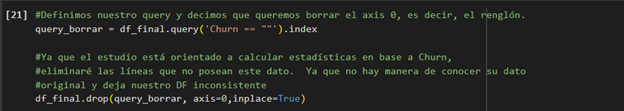

### **6.	Conversión de tipos de datos**

Ya teniendo nuestra lista limpia decidiremos cuales convertiremos en valores booleanos, convirtiendo pues, los valores de 0 y 1; o los valores de Si y No en True y False

Tras una reflexión, se concluyó que las columnas: Churn, SeniorCitizen, Partner, Dependents, PhoneService y PaperlessBilling serán convertidas en booleanas.

Para eso, cree una función que convierte las columnas que se les mandan a valores de True y False.  Utilizándoles entonces para convertir todas las columnas que mencioné.


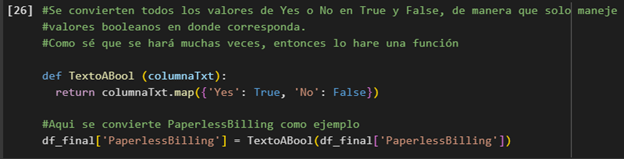

Una vez listo, estos son los tipos de dato de cada columna



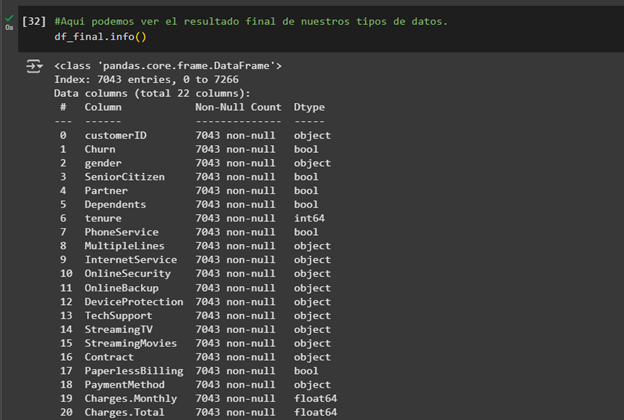

### **7.	Información extra**
Por cuestiones prácticas, fue necesario crear una nueva columna llamada Cuentas_diarias, esta contiene un cálculo de gastos individuales por día, basándose en la tabla de cargos por mes.


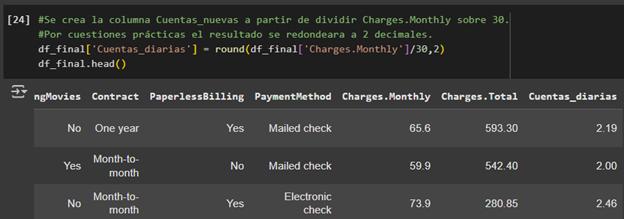

### **8.	Graficación de datos**
Para una correcta manipulación de datos se realizaron funciones que de manera dinámica crearan graficas con distintos tipos de representaciones.


### **9.	Análisis de resultado**
Se realiza el análisis de resultados
1.	Gráfica Boxplot:  La utilizamos para conocer valores proporcionales y estadísticos de nuestras variables numéricas, tal como lo son el valor mínimo, máximo, el 25%, el 75% y la media.
2.	Conteo de barras y grafica de pie: Se utilizó para representar la cantidad total de clientes que cancelaron su servicio y que porcentaje representa del total.
3.	Grafica comparativa de barras:  La utilice para comparar de manera proporcional la cantidad de clientes que comparten las categorías únicas frente a la taza de abandono.
4.	Gráfica de porcentaje apilada:  Identifica las variables de las categorías y compara cual es el porcentaje total que representa cada una de estas en las opciones de cada categoría.
5.	Boxplot de contraste:  Realiza un contraste entre los valores numéricos, a fin de identificar los patrones que tienden a provocar el abandono de los clientes.
6.	Histplot de variables numéricas: grafica los conjuntos de datos ordenados y crea una línea que indica cómo evoluciona su frecuencia frente al valor que estamos comparando.
7.	Tabla de correlación: Calcula la relación de las variables y que tanto influyen entre sí, mostrando al final un mapa de calor.

## **Análisis exploratorio de datos**

### **Análisis descriptivo de las tenencias y sus cargos.**
A continuación, podemos ver los boxplots para las variables numéricas de Tenencias, Cargos mensuales, Cargos diarios y Cargos totales. Estos gráficos presentan los valores máximos y mínimos presentes en nuestro banco de datos.  Mostrando a la vez que valor es igual al 25% y el 75%, dándonos por último la media.


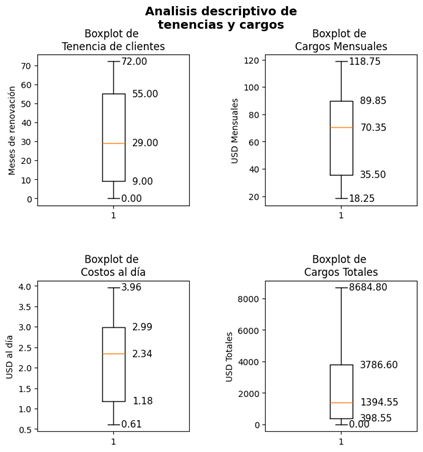

Empezando por las Tenencias, podemos notar que este set de información conforma clientes que no han terminado ni su primer mes dentro de la empresa, así como también hay clientes que tienen 6 años renovando su contrato.  

Aquí podemos ver que la tendencia de los clientes esta entre los 9 y 55 meses, lo que significa que hay una gran cantidad de clientes que se mantienen suscritos después de los primeros meses.

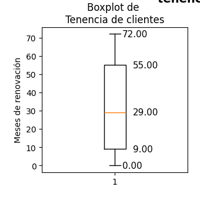

En los costos diarios, podemos ver que hay una media general de `$`2.34 dólares al día, lo que se posiciona como un valor entre por encima del 50% del general. Esto quiere decir que una enorme cantidad de clientes tiende a pagar por precios más altos que una suscripción promedio.  La misma tendencia se ve en la gráfica de Costos mensuales, pero ahora con el precio total de cada usuario por mes, siendo una media de `$`70.35 dólares.

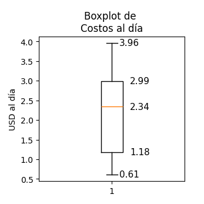

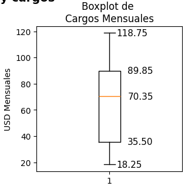

Por último en el boxplot de cargos totales, vemos una tendencia a los valores muy por debajo del cliente que mas ha gastado.  

La media tiende a un numero bastante bajo, lo que significa que una gran mayoria de clientes ha de haber gastado muy poco en comparación a los que más gastaron.

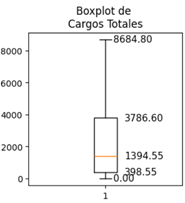

### **Evasion total de clientes**
En la siguiente gráfica podemos ver la cantidad total de clientes que siguen renovando con la empresa, dandonos un total de 5174 clientes en total, en comparación a los 1869 clientes que han dejado de ser clientes de Telecom X.  Estos numeros representan que de el total, 26.54% de los clientes han abandonado la empresa, siendo esto una cifra muy drastica, siendo poco mas de ¼ de los clientes.


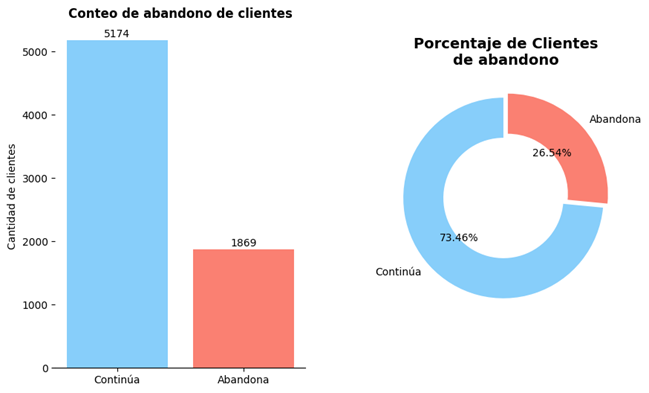

### **Conteo de evasión por categorías de cliente**
A continuación, se muestran unas tablas donde se contrastan la cantidad de clientes que permanecen y los que se van, tomando en cuenta las variables categóricas de cada grupo de característica.


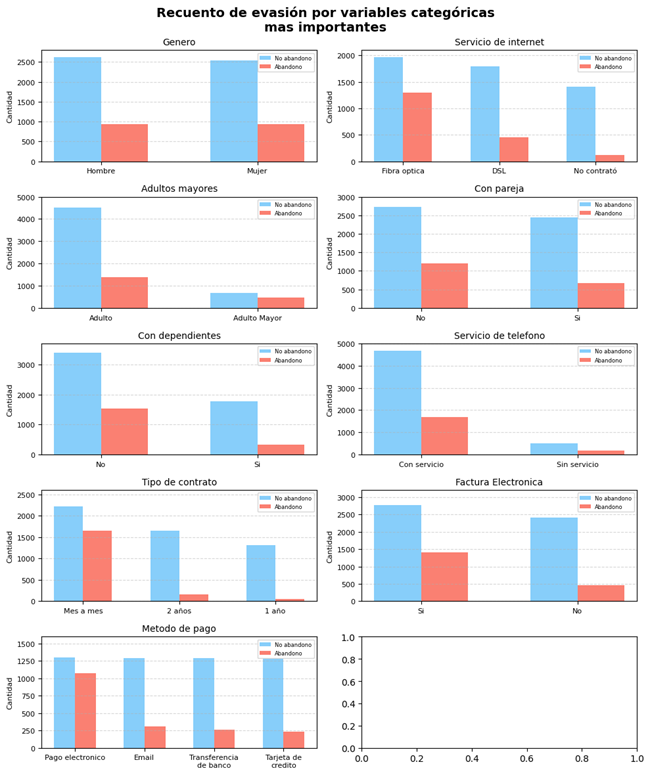

Aquí desglosaré lo que se concluye con cada tabla:
*   Género: La diferencia proporciones por género es tan baja que no representa nada.
*   Servicio de internet: Los clientes que contratan fibra óptica tienden a cancelar su servicio, mientras que los que no contrataron internet es extremadamente raro que abandonen.
*   Adultos mayores: Hay una cantidad extremadamente baja de adultos mayores contratando a la empresa, además de que los que hay, es muy probable que abandonen.
*   Clientes con pareja: Los clientes sin pareja abandonan más, pero solo por muy poco
*   Con dependientes: Los clientes sin dependientes son casi el doble que aquellos con dependientes, pero aquellos sin dependientes tienden a abandonar más.
*   Servicio de teléfono: Hay una cantidad alarmante de clientes que no contratan servicio de teléfono.
*   Tipo de contrato: Los clientes que contratan mes a mes son altamente propensos a abandonar.
*   Factura electrónica: Los clientes que piden factura electrónica suelen abandonar más
*   Método de pago: Los clientes que hacen pago electrónico son altamente propensos a abandonar.


### **Porcentaje de evasión por categorías de cliente**
A continuación, se muestran unas tablas donde se contrastan la cantidad de clientes que permanecen y los que se van, tomando en cuenta las variables categóricas de cada grupo de característica.


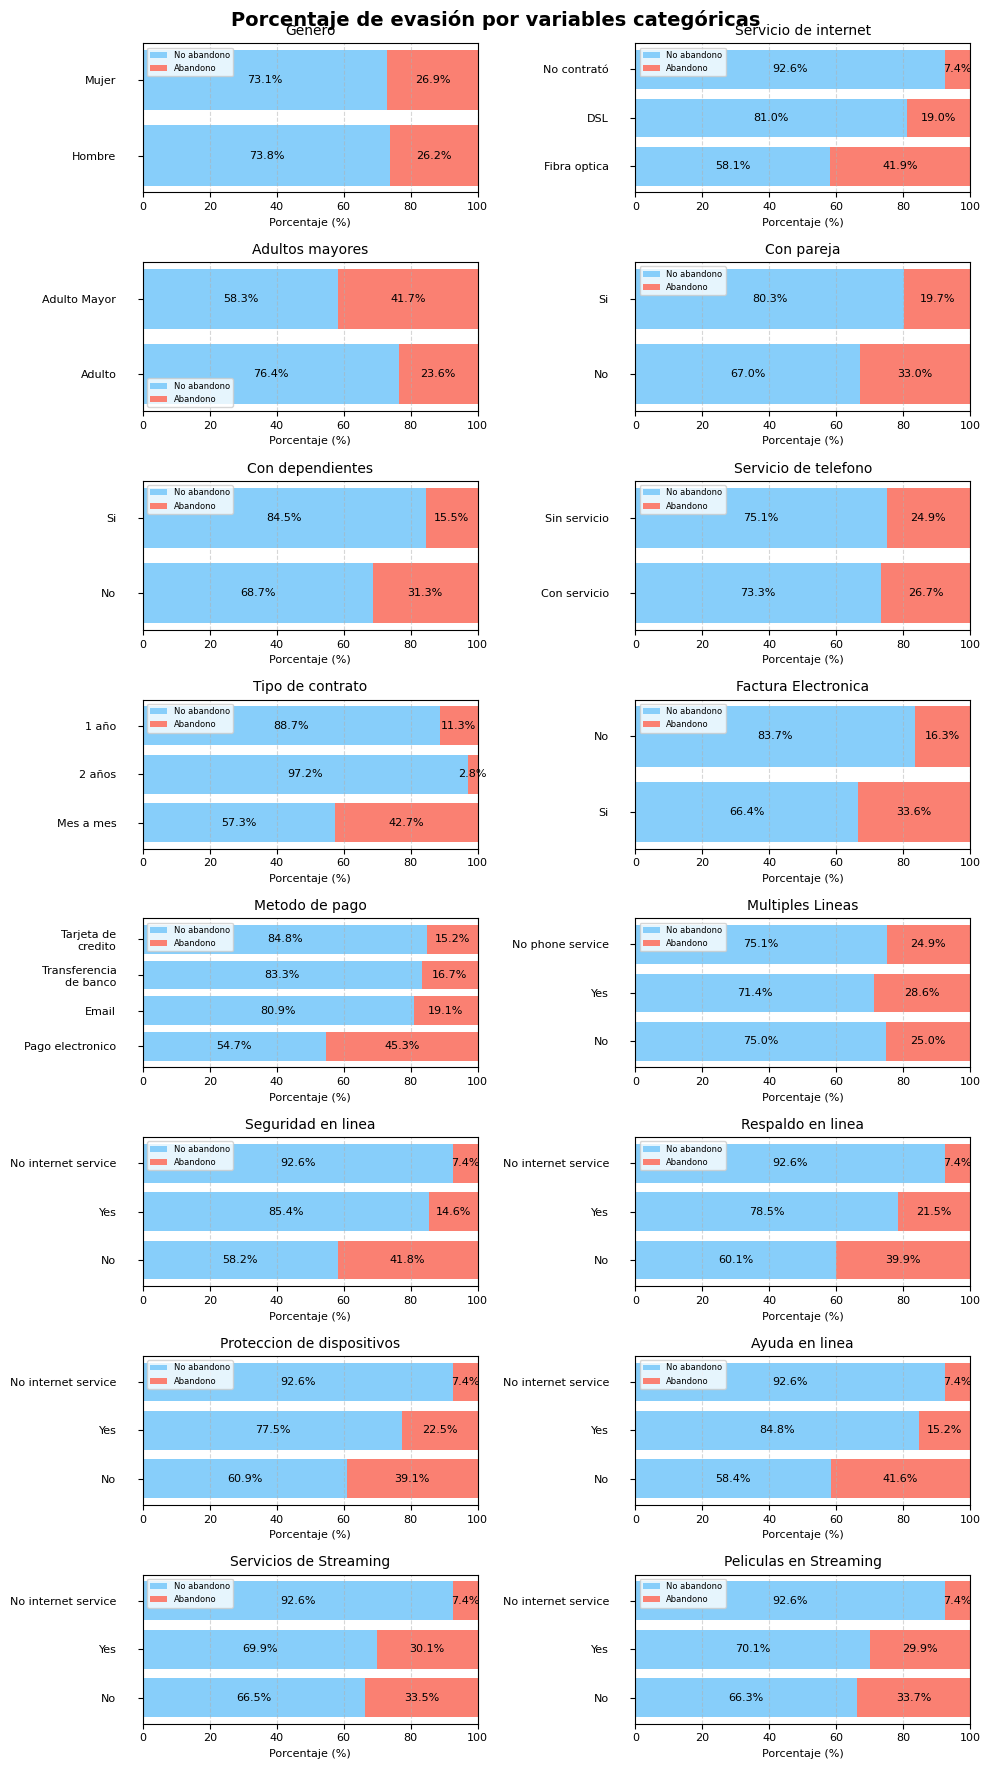

### **Aquí desglosaré lo que se concluye con cada gráfica:**
*   **Género:** Las diferencias entre genero son casi nulas, no parece ser una variable que influya al abandono.
*   **Servicio de internet:** Casi la mitad de los clientes de fibra óptica abandonaron, mientras que menos del 8% de los clientes sin servicio a internet abandonaron.  DSL está en un punto medio.
*   **Adulto Mayor:** Casi el 50% de los adultos mayores abandonan.
*   **Pareja:** Los clientes sin pareja abandonan un tercio de las veces.
*   **Dependientes:** Los clientes sin dependientes abandonan un tercio de las veces.
*   **Servicio de teléfono:** Las diferencias son casi nulas, no parece ser una variable que influya al abandono.
*   **Tipo de contrato:** Los clientes con contrato de 2 años tienen mucho menos de un 3% de porcentaje de abandono, mientras que los clientes de mes por mes alcanzan casi un 43% de porcentaje de abandono.
*   **Factura electrónica:** Los clientes con factura electrónica abandonan el doble de veces que aquellos sin factura electrónica.
*   **Método de pago:** Todos mantienen un porcentaje menor al 20% de abandono con excepción del pago electrónico, la cual tiene un alarmante 45% de abandono.
*   **Múltiples líneas:** Las diferencias entre genero son casi nulas, no parece ser una variable que influya al abandono.
*   **Seguridad en línea:** Los clientes que no contrataron servicio de internet conservan el mismo 7.4% de abandono de la categoría “Servicio de internet”, los clientes que no lo contrataron tuvieron un 41.8% de abandono.
*   **Respaldo en línea:** Los clientes que no contrataron servicio de internet conservan el mismo 7.4% de abandono de la categoría “Servicio de internet”, los clientes que no lo contrataron tuvieron un 39.9% de abandono.
*   **Protección en línea:** Los clientes que no contrataron servicio de internet conservan el mismo 7.4% de abandono de la categoría “Servicio de internet”, los clientes que no lo contrataron tuvieron un 39.1% de abandono.
*   **Protección de dispositivo:** Los clientes que no contrataron servicio de internet conservan el mismo 7.4% de abandono de la categoría “Servicio de internet”, los clientes que no lo contrataron tuvieron un 41.6% de abandono.
*   **Ayuda en línea:** Los clientes que no contrataron servicio de internet conservan el mismo 7.4% de abandono de la categoría “Servicio de internet”, los clientes que no lo contrataron tuvieron un 33.5% de abandono.
*   **Seguridad en línea:** Los clientes que no contrataron servicio de internet conservan el mismo 7.4% de abandono de la categoría “Servicio de internet”, los clientes que no lo contrataron tuvieron un 33.7% de abandono.


### **Análisis descriptivo de evasión en tenencias y sus cargos.**
A continuación, podemos ver los boxplots para las variables numéricas de Tenencias, Cargos mensuales, Cargos diarios y Cargos totales. Estos gráficos separan a los clientes que continúan de aquellos que abandonaron. Aquí podemos ver las tendencias de cada una de las variables numéricas y como esto afecta a la decisión de los clientes.


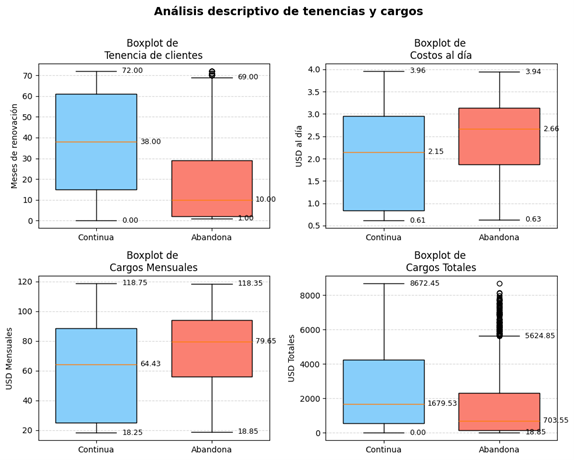

Comenzando por la tabla de tenencia, se puede observar cómo hay una mayor tendencia de los clientes menos antiguos por abandonar, mientras que los clientes más antiguos se mantienen más fieles, dándonos una media de permanencia de 38 meses.

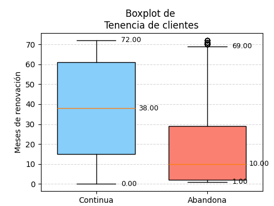

El boxplot de costos al día y cargos mensuales nos muestra que en es muy común para los clientes quedarse en la empresa si es que estos tienen un costo menor.

En el caso de los clientes que abandonan, estos tienen a tener costos mucho más altos, dándonos como media que los clientes que abandonan están teniendo un gasto mensual promedio de $79.65 dólares.

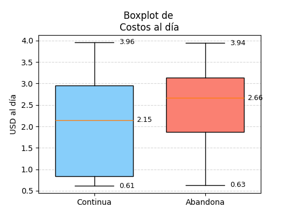

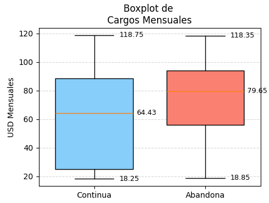

Por último, el boxplot de los gastos totales nos muestra que los clientes que han gastado más suelen ser más fieles a la empresa, mientras que los que menos le ha invertido en total suelen abandonar más. Esto se ve proporcionalmente relacionado con el tiempo de permanencia de los usuarios.  Entre más se quedan más gastan y entre más corta su estancia, más baja habrá sido la suma total de sus cuentas.

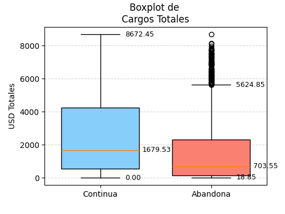

### **Comparación de la evolución de Churn en las variables numéricas.**
A continuación, podemos ver una serie de histplots que muestran la frecuencia en la que suceden nuestras variables numéricas al verse afectadas por abandono y permanencia.


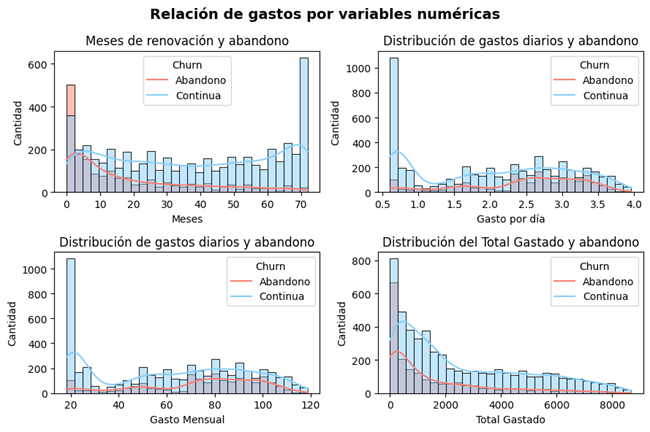

Si seguimos las líneas azules y rojas dentro de la siguiente gráfica, podemos notar como la tendencia a abandonar la empresa se hace más baja conforme el tiempo de tenencia aumenta, mientras que la tendencia a quedarse aumenta conforme más tiempo pasa.

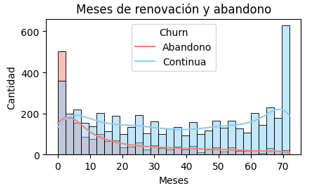

En los gastos, se puede notar como antes de los costos mensuales de $30, hay una tendencia más alta en mantenerse en la empresa, además de un pico bastante sustancial de frecuencia, lo que implica directamente que una enorme cantidad de clientes que mantienen su contrato les gusta pagar poco dinero.

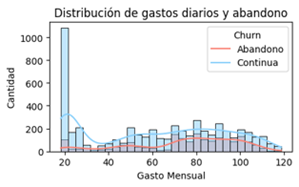

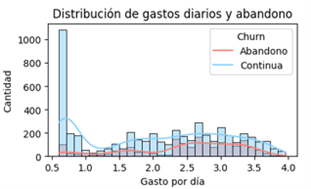

Por último, en la distribución de abandono por cantidad, no parece haber mucha diferencia entre las curvas.  Suelen seguir el mismo patrón, la única diferencia siendo que la línea azul tiene más frecuencia.

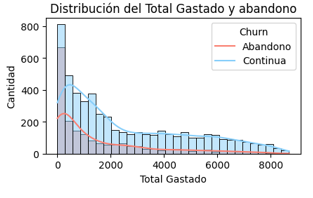

### **Mapa de correlaciones por variables**
Utilizando el mapa de correlaciones, es posible llegar a ciertas conclusiones considerando los valores que resultaron. A continuación, mencionaré aquellas que demuestren un impacto mayor entre sí.

*    **Tenencia y Gastos totales (.83)**

  Esta relación se genera ya que entre más meses han transcurrido, más ha pagado el cliente y más grande será el total.

*    **Gastos mensuales y gastos totales (.65)**

  Los gastos de las mensualidades influyen en la suma del gasto total.

*    **Dependientes y pareja (.45)**

  Esta relación debe ser importante porque muchas parejas suelen tener hijos.

*    **Tenencia y parejas (.38)**

  Mantener una línea para una pareja puede ser importante

*    **Factura electrónica y cuentas mensuales (.35)**

  La relación entre pagar mensualmente y en línea.
*    **Gastos totales y pareja**

  Pagar una cuenta a tu pareja puede aumentar los gastos totales


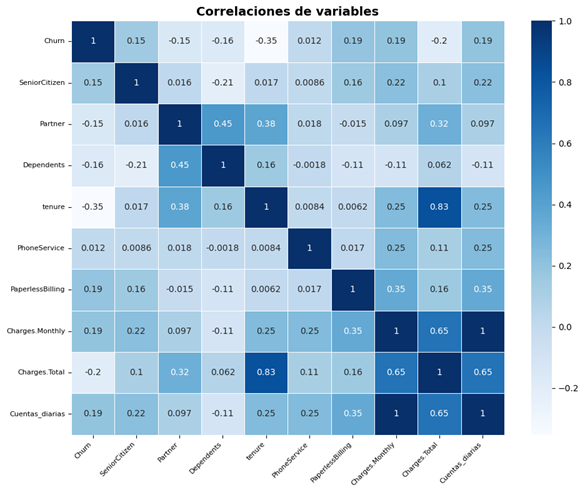

## **Conclusiones e Insights**
De acuerdo con el análisis realizado podemos concluir algunos puntos importantes que son importantes de resaltar.

*   **Contrato mensual son de alto riesgo:** Los clientes que contratan el servicio de mes a mes alcanzan 43% de abandono, comparado al menos del 3% en contratos de 2 años, lo que significa que los clientes de corto plazo no logran conectar con la empresa.

*   **Factura y pagos electrónicos:** Estos clientes muestran tasas de abandono significativamente más altas (hasta 45%) a pesar de que estos servicios buscan facilitar y agilizar los procesos.  Es muy posible que los usuarios presenten problemas de facturación o la plataforma sea difícil de utilizar, lo que provoca que los usuarios abandonen.

*   **Clientes más nuevos terminan en mayor evasión:** Los clientes nuevos son más propensos a irse, entre más tiempo pasan estos en la empresa más comprometidos se sienten por seguir renovando.

*   **Tendencia de adultos mayores a abandonar:** De los adultos mayores casi la mitad abandona. Se sabe que la gente mayor se le complica mucho adaptarse a las nuevas tecnologías, podría deberse a barreras tecnológicas o que consideran el servicio un desperdicio.

*   **Problemas de infraestructura:**  Los clientes que contrataron servicio de internet con fibra óptica son altamente propensos a abandonar.  Esto puede causar del precio o causa de un mal servicio.  En ambos casos, es importante replantear la estrategia.

*   **Servicios inutilizados:** La empresa presenta un enorme número de servicios fuera de uso. El servicio telefónico solo es contratado por apenas 10% de los clientes.  Al igual que los servicios de subcontratación de internet (Streaming, soporte, etc) difícilmente son contratados por los clientes, siendo solicitados apenas el 50% de las veces en todos los casos.

*   **Precios desbalanceados:** Se pudo observar que dentro de los clientes existen solo 2 tendencias: Los que pagan demasiado poco y los que pagan mucho, hay que encontrar un punto medio que le de la oportunidad a otros clientes de tener acceso a precios más razonables o periodos más accesibles.

## **Recomendaciones y sugerencias estratégicas.**
En base a las observaciones planteadas en el punto anterior. A continuación, procederé a ofrecer una serie de recomendaciones para tomar acción frente a la situación.
*  **Buscar la lealtad de los clientes desde temprano:**  Hay que buscar la manera de fidelizar a los clientes desde un periodo temprano de su contrato, ofreciendo ofertas, paquetes, descuentos o promociones durante los primeros meses de contrato en el caso de tratarse de un contrato de mes por mes.  De igual manera, buscar aumentar la frecuencia de contratos de 1 año o 2 años.

*   **Mejorar las plataformas de servicio en línea:** Es necesario realizar un estudio sobre las plataformas de pago en línea y facturación en línea, buscando problemas en la experiencia de usuario, velocidad de respuesta de los servidores y flexibilidad de la plataforma, con el objetivo de facilitar la experiencia del usuario.

*  ** Promover la contratación de los servicios secundarios:** Ofrecer paquetes que incluyan una promoción donde los clientes puedan conocer el uso de los servicios somo respaldo en línea y seguridad, crear con estos mismos un tipo de asesorías que sirvan para orientarle en cómo usar el servicio.

*   **Beneficios para la 3ra edad:** Ofrecer a los adultos mayores precios preferenciales o paquetes especiales que se adapten a sus necesidades como personas que son posiblemente analfabetas tecnológicas.  Otorgarles una guía y orientación sobre como el uso de esas tecnologías es beneficiosa para ellos y convencerlos de conservar el servicio.

*   **Replantear la lista de precios:** Ajustar los precios o los plazos más razonables, dígase, por ejemplo, agregar planes de 3 meses y 6 meses. Lo cual no obligaría al cliente a contratar por un año completo y dejaría que el cliente tenga un periodo de adaptación al servicio mas grande que solo un mes.

*   **Ofrecer pruebas gratuitas:** En la compra de ciertos paquetes, podría ofrecerse por ejemplo servicio de streaming y películas con el objetivo de que los clientes se sientan atraídos por los regalos que vienen junto.

*   **Beneficios a clientes antiguos:** Ofrecer algún tipo de incentivos para que los clientes se sientan atraídos a alcanzar una meta de meses contratados y como resultado, no abandonar.
